In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 3.1 Churn Prediction
[Overview of Churn Prediction](https://www.youtube.com/watch?v=0Zw04wdeTQo&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=29)

This project focuses on using Binary Classification. The goal is to predict whether a customer will churn (leave the service) or not. 

<div align="center"><b>Binary Classification Formula:</b></div>

$$g(x_i) \approx y_i$$

Where:
- $y_i$ is the true label (0 or 1) for the $i^{th}$ instance
- 0 -> Not Churn
- 1 -> Churn

# 3.2 Data Preparation

In [58]:
# Read the data
url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [59]:
# Transpoosing data to see all fields easier
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [60]:
# Standardizing column names
df.columns = df.columns.str.lower().str.replace(' ','_')

# Standardizing categorical columns to lowercase and replacing spaces with underscores
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.5,no
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.9,no
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,no
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.6,yes


In [61]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [62]:
# Force totalcharges to be numeric, setting errors to 'coerce' will turn invalid parsing into NaN
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

# Replacing NaN values with 0
df.totalcharges = df.totalcharges.fillna(0)

In [63]:
df[tc.isna()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


In [64]:
df['churn']

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [ ]:
# cnvert to a binary variable
df['churn'] = (df['churn'] == 'yes').astype(int)

# 3.3 Validation framework
- Perform the train/validation/test split using Scikit-Learn's `train_test_split` function.

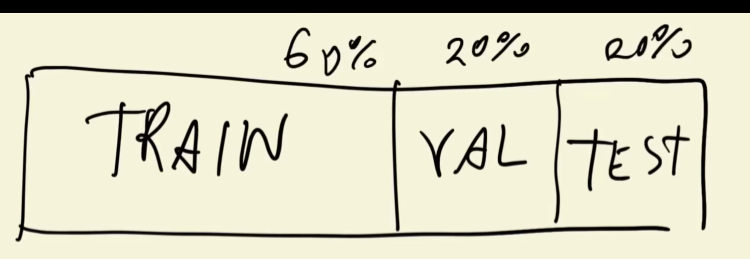

In [71]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [75]:
#Split full_Train into Train & Validation

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [93]:
print(f'df_train size: {len(df_train)}\ndf_val size: {len(df_val)}\ndf_test size: {len(df_test)}')

df_train size: 4225
df_val size: 1409
df_test size: 1409


In [94]:
# reset index
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [95]:
# Storing Target Variables
y_train = df_train['churn']
y_val = df_val['churn']
y_test = df_test['churn']

In [97]:
# remove Target from df
del df_train['churn']
del df_val['churn']
del df_test['churn']

# 3.4 Exploratory Data Analysis (EDA)
1. check for missing values
2. look at the target variable *(churn)*
3. look at numerical variables
4. look at categorical variables

In [ ]:
#1. Check for missing values
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

The are no missing values in the dataset. No need to replace any values.

In [122]:
#2. Look at the Target variable
df_full_train['churn'].value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

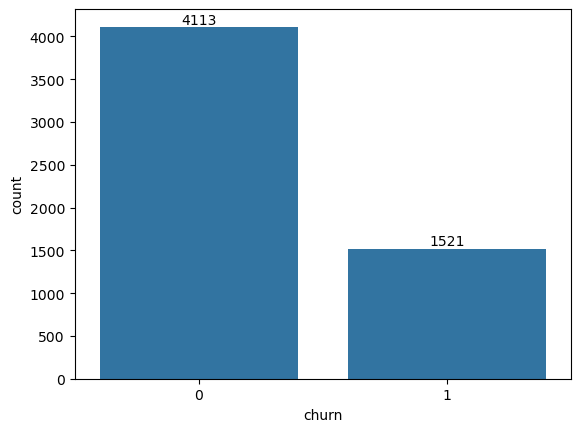

In [145]:
ax = sns.countplot(x='churn', data=df_full_train)
ax.bar_label(ax.containers[0])
plt.show()

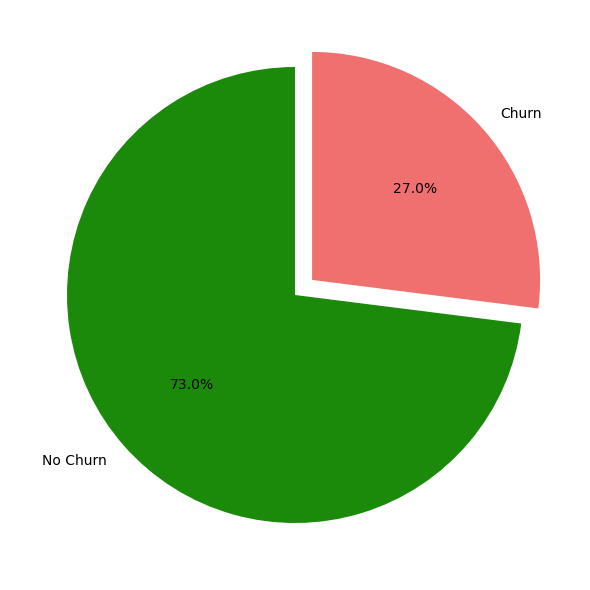

In [ ]:
churn_norm = df_full_train['churn'].value_counts(normalize=True).sort_index()

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(churn_norm.values, labels=['No Churn', 'Churn'], autopct='%.1f%%', startangle=90, explode =(0, 0.1), colors=["#20B00A","#f07070"])
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [169]:
# list of numeric categories
num_cols  = ['tenure', 'monthlycharges', 'totalcharges']
num_cols 

['tenure', 'monthlycharges', 'totalcharges']

In [171]:
cat_cols = ['gender', 'seniorcitizen', 'partner', 'dependents',
            'phoneservice', 'multiplelines', 'internetservice',
            'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
            'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
            'paymentmethod'
            ]
cat_cols

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [177]:
df_full_train[cat_cols].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# 3.5 Feature Importance: Churn rate & Risk Ratio

Feature importance analysis *(part of EDA)* helps us identify which features affect the target variable the most.

- **Churn Rate**: The proportion of customers who churn within a specific group or category. It is calculated as:
$$Churn Rate = \frac{Number\ of\ Churned\ Customers\ in\ Group}{Total\ Number\ of\ Customers\ in\ Group}$$
- **Risk Ratio (Relative Risk)**: The ratio of the probability of an event occurring in an exposed group to the probability of the event occurring in a non-exposed group. It is calculated as:
$$Risk\ Ratio = \frac{Churn\ Rate\ in\ Exposed\ Group}{Churn\ Rate\ in\ Non-Exposed\ Group}$$
- Mutual Information:

## Churn Rate

In [181]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [ ]:
# Churn Rate for Females
churn_female = df_full_train[df_full_train['gender']=='female']['churn'].mean()
churn_female

np.float64(0.27682403433476394)

In [186]:
# Churn Rate for Male
churn_male = df_full_train[df_full_train['gender']=='male']['churn'].mean()
churn_male

np.float64(0.2632135306553911)

In [ ]:
# Universal Churn Rate
global_churn = df_full_train['churn'].mean()
global_churn

np.float64(0.26996805111821087)

In [190]:
# Churn for no Partner
churn_partner_no = df_full_train[df_full_train['partner']== 'no']['churn'].mean()
churn_partner_no

np.float64(0.3298090040927694)

In [194]:
# Churn for yes Partner
churn_partner = df_full_train[df_full_train['partner']== 'yes']['churn'].mean()
churn_partner

np.float64(0.20503330866025166)

In [213]:
np.round(global_churn*100 - churn_partner*100, 3)

np.float64(6.493)

In [221]:
global_churn - churn_partner

np.float64(0.06493474245795922)

In [206]:
np.round(global_churn*100 - churn_partner_no*100,3)

np.float64(-5.984)

In [222]:
global_churn - churn_partner_no

np.float64(-0.05984095297455855)

**Feature Importance**:

1. Difference between the overall churn rate and the churn rate for each category of a feature.
$$Global - Group$$

If difference > than 0, then the global churn rate is higher than the group churn rate. This means that the group is less likely to churn than the average customer.

If difference < than 0, then the global churn rate is lower than the group churn rate. This means that the group is more likely to churn than the average customer.

If difference = 0, then the global churn rate is equal to the group churn rate. This means that the group has the same likelihood of churning as the average customer.


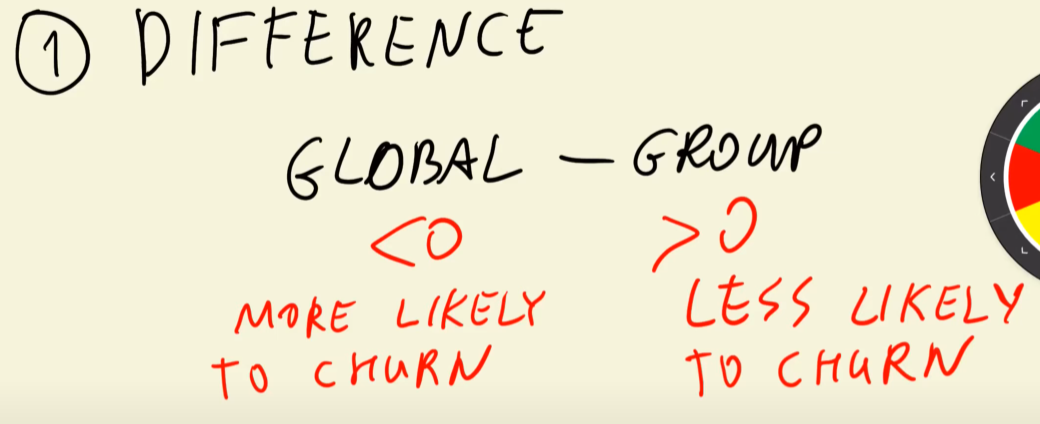

## Risk Ratio

<div align="center"><b>Risk Ratio Formula:</b></div>

$$Risk=\frac{Group}{Global}$$

<br><br>
Where:
- **Group** = Churn Rate for the specific group/category
- **Global** = Churn Rate for all customers
- If Risk > 1, then the group is more likely to churn than the average customer.
- If Risk < 1, then the group is less likely to churn than the average customer

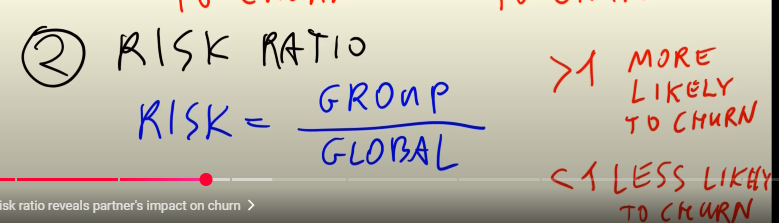

In [223]:
churn_partner_no / global_churn

np.float64(1.2216593879412643)

In [224]:
churn_partner / global_churn

np.float64(0.7594724924338315)

In [231]:
from IPython.display import display

In [232]:
for c in cat_cols:
    print(c)
    df_group = df_full_train.groupby(c)['churn'].agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121
